In [1]:
%matplotlib notebook
%reset -f


import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import preprocessing

### Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
# Fonte: 

df = pd.read_excel("jogo.xlsx")

In [4]:
deletar = df.loc[((df.Global_Sales.fillna(0)) == 0) & ((df.Total_Shipped.fillna(0)) == 0)]
a = deletar.index
dados = df.drop(a)

In [5]:
dados["Sales"] = dados["Global_Sales"].fillna(0) + dados["Total_Shipped"].fillna(0)

In [6]:


dados = dados.drop(columns = ["Global_Sales","Total_Shipped","url","status","img_url","NA_Sales" ,"PAL_Sales","JP_Sales" ,"Other_Sales","VGChartz_Score"])


In [7]:
dados = dados.fillna(0)

# Análise Exploratória

0.2724554544459939

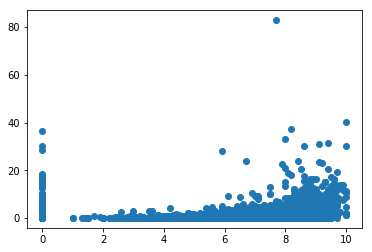

In [8]:
plt.scatter(dados.Critic_Score,dados.Sales);
dados.Critic_Score.corr(dados.Sales)

In [9]:
dados.Genre.values

array(['Sports', 'Platform', 'Racing', ..., 'Fighting', 'Adventure',
       'Adventure'], dtype=object)

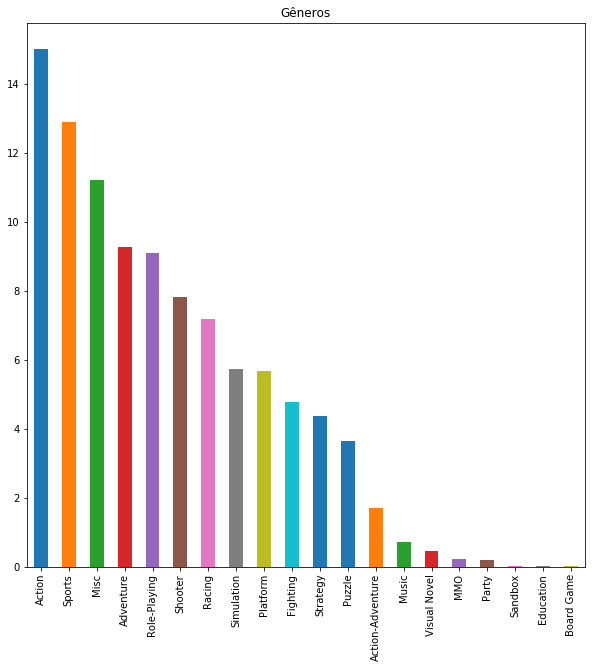

In [10]:
generos = dados.Genre.value_counts(True)*100
generos
plot = generos.plot(kind="bar",title="Gêneros",figsize = (10,10))

In [11]:
quantitativas = ['Rank', 'Critic_Score',
       'User_Score','Vgchartzscore','Sales','Year']

In [12]:
dados.Genre = dados.Genre.astype('category')
dados.ESRB_Rating = dados.ESRB_Rating.astype('category')
dados.Platform = dados.Platform.astype('category')
dados.Publisher = dados.Publisher.astype('category')
dados.Developer = dados.Developer.astype('category')


In [13]:
data = dados.loc[:,quantitativas]

In [14]:
x_vars = ['Critic_Score',
       'User_Score','Vgchartzscore','Sales']
y_vars = x_vars

In [15]:
#sns.set(style="ticks")

#sns.pairplot(dados, hue="Genre", x_vars=x_vars, y_vars=y_vars)

In [16]:
#sns.pairplot(dados, hue="Genre", kind="reg", x_vars=x_vars, y_vars=y_vars)

In [17]:
qualitativas = ['Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer']
quantitativas = ['Rank', 'Critic_Score',
       'User_Score','Vgchartzscore','Sales','Year']

In [18]:
# Separaremos as preditoras
quant_x = quantitativas.copy()
quant_x.remove('Sales')
np.asarray(dados)

array([[1, 'Wii Sports', 'wii-sports', ..., 0, 0.0, 82.86],
       [2, 'Super Mario Bros.', 'super-mario-bros', ..., 0, 0.0, 40.24],
       [3, 'Mario Kart Wii', 'mario-kart-wii', ..., '11th Apr 18', 8.7,
        37.14],
       ...,
       [19860, 'Ashita no Joe 2: The Anime Super Remix',
        'ashita-no-joe-2-the-anime-super-remix', ..., 0, 0.0, 0.01],
       [19861, 'Tokyo Yamanote Boys for V: Main Disc',
        'tokyo-yamanote-boys-for-v-main-disc', ..., 0, 0.0, 0.01],
       [19862, 'NadePro!! Kisama no Seiyuu Yatte Miro!',
        'nadepro-kisama-no-seiyuu-yatte-miro', ..., 0, 0.0, 0.01]],
      dtype=object)

In [19]:
results = regress(((dados.loc[:, quant_x]).fillna(0)).astype(float), dados.Sales)

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     1076.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):               0.00
Time:                        08:16:48   Log-Likelihood:                -34736.
No. Observations:               19821   AIC:                         6.948e+04
Df Residuals:                   19815   BIC:                         6.953e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2970      0.781      1.661      0.097      -0.233       2.827
Rank             -0.0001   1.85e-06    -54.667      0.000      -0.000   -9.77e-05
Critic_Score      0.0564      0.003     16.331      0.000       0.050       0.063
User_Score        0.1963      0.011     17.510      0.000       0.174       0.218
Vgchartzscore     0.0351      0.009      4.099      0.000       0.018       0.052
Year           5.755e-05      0.000      0.148      0.882      -0.001       0.001
==============================================================================
Omnibus:                    43081.143   Durbin-Watson:                   0.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        450906098.289
Skew:                          19.348   Prob(JB):                         0.00
Kurtosis:                     740.886   Cond. No.                     9.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
quant_x2 = quant_x.copy()
quant_x2.remove('Year')

In [22]:
results2 = regress(((dados.loc[:, quant_x2]).fillna(0)).astype(float), dados.Sales)

In [23]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     1345.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):               0.00
Time:                        08:16:48   Log-Likelihood:                -34736.
No. Observations:               19821   AIC:                         6.948e+04
Df Residuals:                   19816   BIC:                         6.952e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4124      0.023     60.540      0.000       1.367       1.458
Rank             -0.0001   1.85e-06    -54.702      0.000      -0.000   -9.77e-05
Critic_Score      0.0564      0.003     16.332      0.000       0.050       0.063
User_Score        0.1963      0.011     17.512      0.000       0.174       0.218
Vgchartzscore     0.0352      0.009      4.102      0.000       0.018       0.052
==============================================================================
Omnibus:                    43081.001   Durbin-Watson:                   0.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        450898343.584
Skew:                          19.348   Prob(JB):                         0.00
Kurtosis:                     740.880   Cond. No.                     2.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Limpeza da Base de Dados
**Só vão ser usadas as linhas que possuem todas as informações relevantes para a regressão**

In [24]:
limpa = dados.loc[((dados.Sales != 0 ) & (dados.Critic_Score != 0))]
limpa

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Last_Update,Vgchartzscore,Sales
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,0.0,2006.0,0,0.0,82.86
1,2,Super Mario Bros.,super-mario-bros,Platform,0,NES,Nintendo,Nintendo EAD,10.0,0.0,1985.0,0,0.0,40.24
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,11th Apr 18,8.7,37.14
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,0,8.8,33.09
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,9.4,0.0,1998.0,0,0.0,31.38
6,7,New Super Mario Bros.,new-super-mario-bros,Platform,E,DS,Nintendo,Nintendo EAD,9.1,8.1,2006.0,0,0.0,30.80
8,9,New Super Mario Bros. Wii,new-super-mario-bros-wii,Platform,E,Wii,Nintendo,Nintendo EAD,8.6,9.2,2009.0,0,9.1,30.22
9,10,Minecraft,minecraft,Misc,0,PC,Mojang,Mojang AB,10.0,0.0,2010.0,05th Aug 18,0.0,30.01
11,12,Wii Play,wii-play,Misc,E,Wii,Nintendo,Nintendo EAD,5.9,4.5,2007.0,0,5.3,28.02
12,13,Kinect Adventures!,kinect-adventures,Party,E,X360,Microsoft Game Studios,Good Science Studio,6.7,0.0,2010.0,29th Sep 18,6.2,24.00


# Regressão com Dummy para quantidade de cópias vendidas

In [25]:
def dummify(data, column_name):
    """
        Converte a coluna column_name em dummies / one-hot e as adiciona ao dataframe
        retorna uma copia do  df original *sem* a coluna que foi dummified
    """
    df = data.copy()
    # Nota: se você for um econometrista, pode se interessar por usar a opção dropFirst = True na get_dummies
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

In [26]:
res = dummify(limpa, ['Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer'])


In [27]:
z = res.drop(columns=quantitativas)


In [28]:
quant_x2.extend(z)
quant_x2.remove("Rank")
quant_x2.remove("Name")
quant_x2.remove("basename")
quant_x2.remove("Last_Update")

In [29]:
results_dummy = regress(((res.loc[:,quant_x2]).fillna(0)).astype(float), res.Sales)

KeyboardInterrupt: 

In [ ]:
results_dummy.summary()

# Regressão com Dummy para Nota do jogo